<a href="https://colab.research.google.com/github/BishalDali/Breast_Cancer_Prediction/blob/main/BishalDali_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name:Racht Poudel                                                                          
ID : 2358426

#**Apple  Quality**

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import metrics
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path ="/content/drive/MyDrive/apple_quality.csv"

Importing in Notebook.

**Data Understanding**

In [ ]:
# Setting data in dataframe using pandas
df = pd.read_csv(file_path)
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   A_id     4000 non-null   float64
 1   Acidity  4001 non-null   object 
 2   Quality  4000 non-null   object 
dtypes: float64(1), object(2)
memory usage: 93.9+ KB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [ ]:
df.dtypes

A_id           float64
Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity         object
Quality         object
dtype: object

Our response variable, diagnosis, is categorical and has two classes, 'B' (Benign) and 'M' (Malignant).

<ipython-input-26-ca163f00449e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['Juiciness'], palette='RdBu')


<Axes: ylabel='count'>

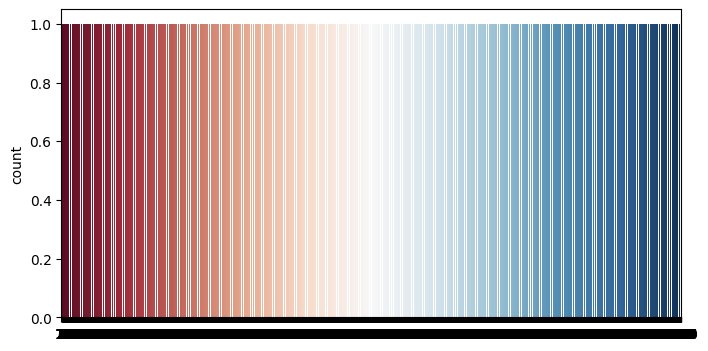

In [ ]:
#Comparing the destiny variable
plt.figure(figsize=(8, 4))
sns.countplot(df['Juiciness'], palette='RdBu')

In [ ]:
counts = df['Juiciness'].value_counts()
benign = counts.get('Benign', 0)
malignant = counts.get('Malignant', 0)

print('Number of cells labeled Benign: ', benign)
print('Number of cells labeled Malignant: ', malignant)
print('')
print('% of cells labeled Benign: ', round(benign / len(df) * 100, 2), '%')
print('% of cells labeled Malignant: ', round(malignant / len(df) * 100, 2), '%')


Number of cells labeled Benign:  0
Number of cells labeled Malignant:  0

% of cells labeled Benign:  0.0 %
% of cells labeled Malignant:  0.0 %


Index(['A_id', 'Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness',
       'Ripeness', 'Acidity', 'Quality'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable h

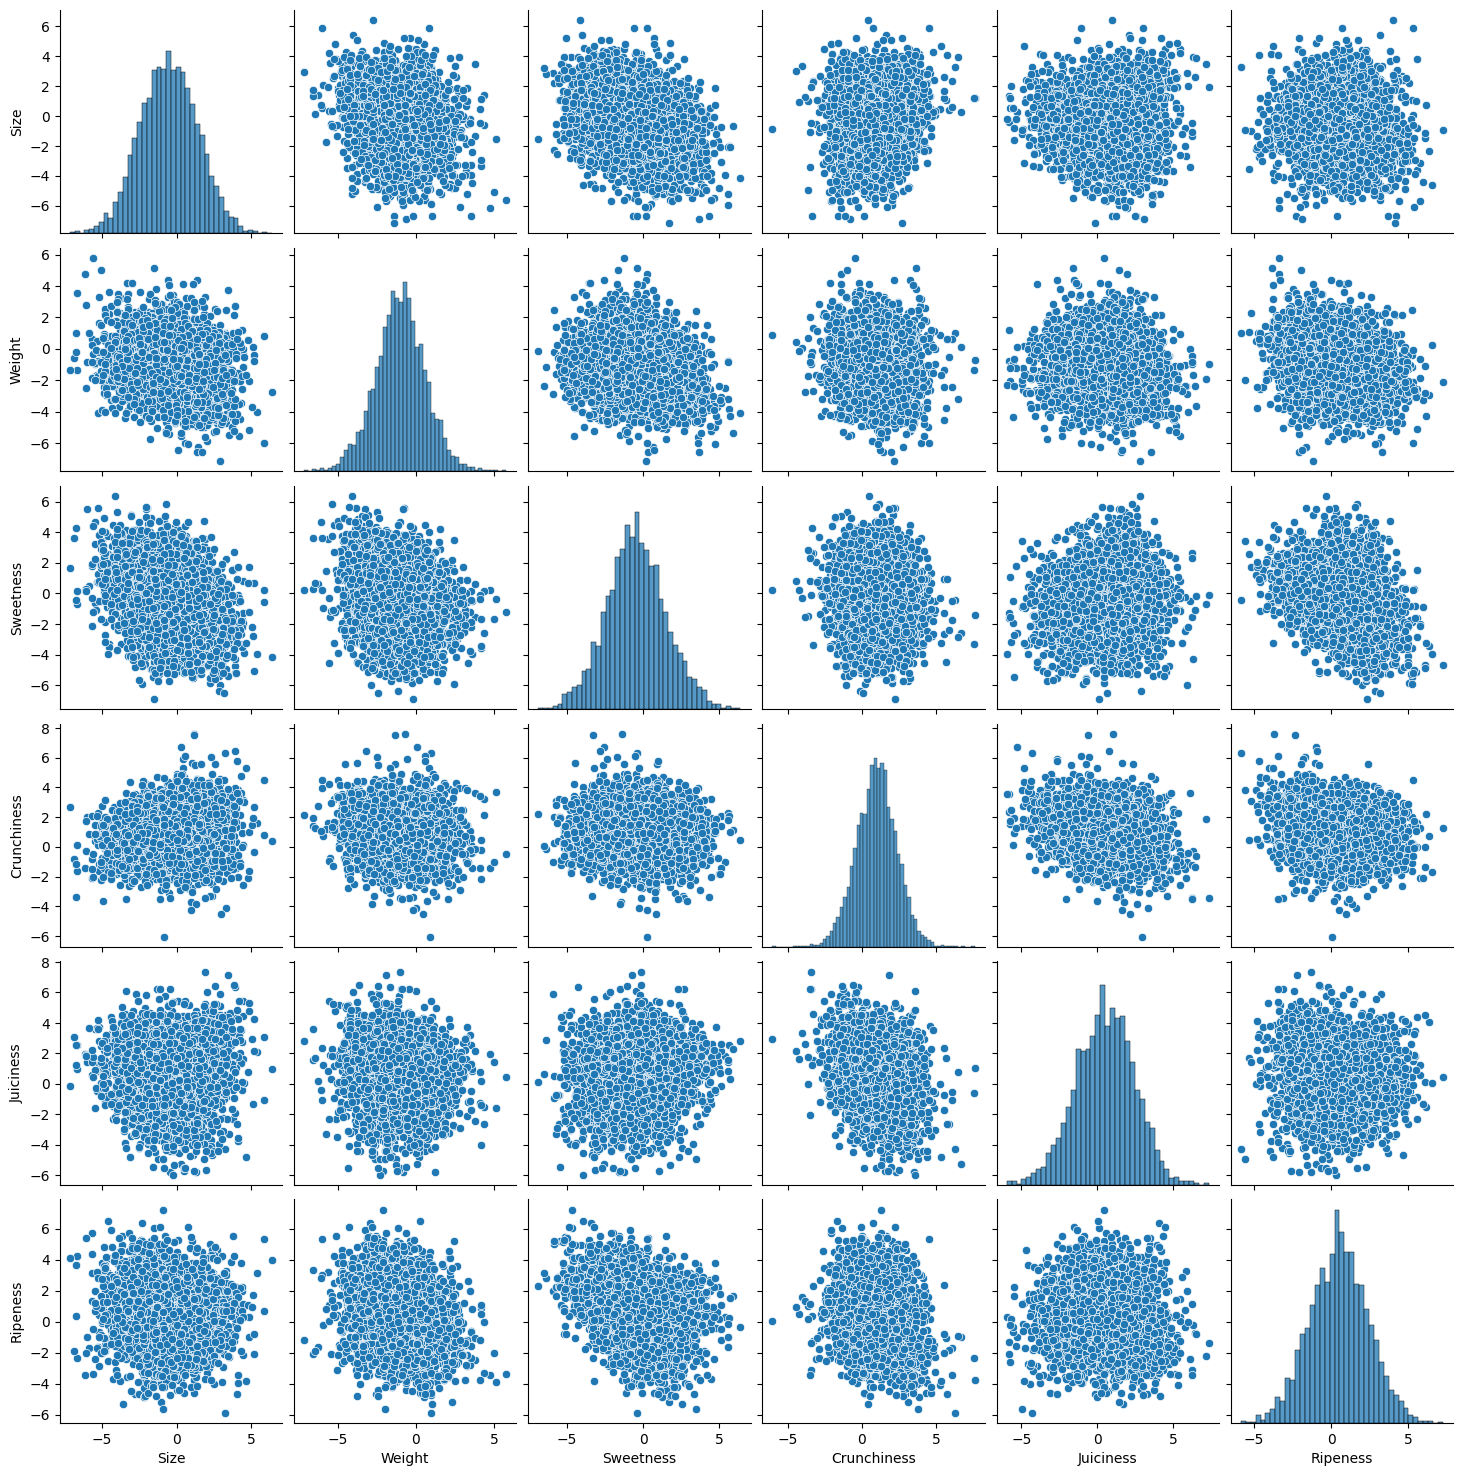

In [ ]:
import seaborn as sns

# Check the column names in the DataFrame
print(df.columns)

# Define the correct column names in the `cols` list
cols = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness']

# Run the code again with the corrected column names
sns.pairplot(data=df[cols], palette='RdBu')


In [ ]:
corr = df.corr().round(2)
corr

<ipython-input-33-374446758d1d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr().round(2)


,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
A_id,1.00,-0.03,-0.01,-0.00,-0.01,0.01,0.00
Size,-0.03,1.00,-0.17,-0.32,0.17,-0.02,-0.13
Weight,-0.01,-0.17,1.00,-0.15,-0.10,-0.09,-0.24
Sweetness,-0.00,-0.32,-0.15,1.00,-0.04,0.10,-0.27
Crunchiness,-0.01,0.17,-0.10,-0.04,1.00,-0.26,-0.20
Juiciness,0.01,-0.02,-0.09,0.10,-0.26,1.00,-0.10
Ripeness,0.00,-0.13,-0.24,-0.27,-0.20,-0.10,1.00


<ipython-input-34-a155e3792806>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

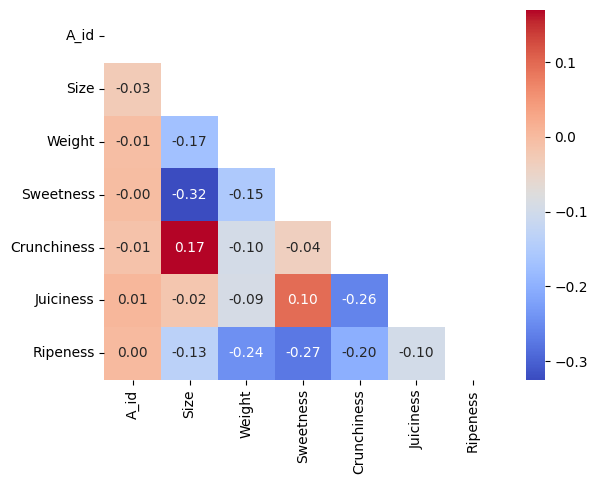

In [ ]:
import numpy as np
import seaborn as sns

# Create a correlation matrix
corr = df.corr()

# Create a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)

# Set the upper triangle indices of the mask to True
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt=".2f")


From the Heat map we can see all the repititive and uneffecting columns which should be dropped in order to get good output.

In [ ]:
df['Quality'] = df['Quality'].astype(str)

# Identify non-numeric values in the column
non_numeric_values = df[~df['Quality'].str.isdigit()]['Quality'].unique()

# Print non-numeric values
print("Non-numeric values:", non_numeric_values)

# Handle or remove non-numeric values before converting to integer
# Convert non-numeric values to NaN
df['Quality'] = pd.to_numeric(df['Quality'], errors='coerce')

# Now, convert the column to integer type
df['Quality'] = df['Quality'].astype('Int64')  # Convert to nullable integer type

Non-numeric values: ['good' 'bad' 'nan']


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame containing the data
X = df  # Features
y = df['Acidity']  # Target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

# Displaying the shapes of the resulting datasets (optional)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (2800, 9)
Shape of X_test: (1201, 9)
Shape of y_train: (2800,)
Shape of y_test: (1201,)


In [ ]:
df.columns

Index(['A_id', 'Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness',
       'Ripeness', 'Acidity', 'Quality'],
      dtype='object')

Creating formula to implement Classifiaction regression

In [ ]:
cols = df.columns.drop('Quality')
formula = ' Acidity ~ ' + ' + '.join(cols)
print(formula, '\n')

 Acidity ~ A_id + Size + Weight + Sweetness + Crunchiness + Juiciness + Ripeness + Acidity 



The formula includes all of the variables that were finally selected at the end of the previous section. We will now run the logistic regression with this formula and take a look at the results.

In [ ]:
# Convert 'Acidity' column to binary values (0 or 1)
# Assuming that values above a certain threshold represent acidity (e.g., > 0.5)
threshold = 0.5
df['Acidity'] = (df['Acidity'] > threshold).astype(int)

# Now, proceed with the logistic regression model
import statsmodels.formula.api as smf

# Define the formula for logistic regression
formula = "Acidity ~ A_id + Size + Weight + Sweetness + Crunchiness + Juiciness + Ripeness"

# Create and fit the logistic regression model
model = smf.logit(formula=formula, data=df)
logistic_fit = model.fit()

# Display the summary of the model
print(logistic_fit.summary())


<ipython-input-125-46869ae04c80>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Acidity'] = (df['Acidity'] > threshold).astype(int)


Optimization terminated successfully.
         Current function value: 0.619216
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                Acidity   No. Observations:                 4000
Model:                          Logit   Df Residuals:                     3992
Method:                           MLE   Df Model:                            7
Date:                Mon, 12 Feb 2024   Pseudo R-squ.:                 0.08720
Time:                        15:26:34   Log-Likelihood:                -2476.9
converged:                       True   LL-Null:                       -2713.5
Covariance Type:            nonrobust   LLR p-value:                 4.566e-98
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.2823      0.079     -3.559      0.000      -0.438      -0.127
A_id         -2.01e-06   2

Finally, after completing the formula, we can test the data and the result is converted is then converted into

In [ ]:
# Testing the prediction model
X_test['Juiciness'] = (
    X_test['Size'] +
    X_test['Weight'] +
    X_test['Sweetness'] +
    X_test['Crunchiness'] +
    X_test['Ripeness']
)

# Make predictions using the logistic regression model
predictions = logistic_fit.predict(X_test)
print(predictions[1:6])


2606    0.050787
2441    0.376143
3415    0.629058
2658    0.077348
2047    0.122980
dtype: float64


In [ ]:
# Make predictions using the logistic regression model
predictions = logistic_fit.predict(X_test)

# Converting these probabilities into nominal values and checking the first 5 predictions again.
predictions_nominal = ["M" if x < 0.5 else "B" for x in predictions]
predictions_nominal[1:6]


['M', 'M', 'B', 'M', 'M']

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score
print(classification_report(y_test, predictions_nominal, digits=3))

                                   precision    recall  f1-score   support

                     -0.009153027      0.000     0.000     0.000       1.0
                     -0.011582814      0.000     0.000     0.000       1.0
                     -0.021881716      0.000     0.000     0.000       1.0
                     -0.025322858      0.000     0.000     0.000       1.0
                     -0.031126053      0.000     0.000     0.000       1.0
                     -0.032305611      0.000     0.000     0.000       1.0
                     -0.033737529      0.000     0.000     0.000       1.0
                     -0.037817127      0.000     0.000     0.000       1.0
                     -0.040585042      0.000     0.000     0.000       1.0
                     -0.043227512      0.000     0.000     0.000       1.0
                     -0.045203447      0.000     0.000     0.000       1.0
                     -0.049403327      0.000     0.000     0.000       1.0
                     -0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
from sklearn.metrics import confusion_matrix

# Make predictions using the logistic regression model
predictions = logistic_fit.predict(X_test)

# Converting these probabilities into nominal values
predictions_nominal = ["M" if x < 0.5 else "B" for x in predictions]

# Calculate the confusion matrix
cfm = confusion_matrix(y_test, predictions_nominal)

# Extracting values from the confusion matrix
true_negative = cfm[0][0]
false_positive = cfm[0][1]
false_negative = cfm[1][0]
true_positive = cfm[1][1]

# Print confusion matrix and other metrics
print('Confusion Matrix: \n', cfm, '\n')
print('True Negative:', true_negative)
print('False Positive:', false_positive)
print('False Negative:', false_negative)
print('True Positive:', true_positive)
print('Correct Predictions', round((true_negative + true_positive) / len(predictions_nominal) * 100, 1), '%')


Confusion Matrix: 
 [[0 0 0 ... 0 0 1]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 1]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]] 

True Negative: 0
False Positive: 0
False Negative: 0
True Positive: 0
Correct Predictions 0.0 %


isualise the confusion matrix. Create a graphic depiction to aid comprehension (change axis labels as appropriate).
Calculate extra metrics. Depending on your objective, consider using metrics like as mean squared error (MSE), mean absolute error (MAE), R-squared, or root mean squared error (RMSE).
Consult with machine learning professionals. Seek advice from competent practitioners on complicated topics.
